# GitHub Issues/Errors to Work Through + Solved!

## ISSUE #1 Slicing (SOLVED)

In [10]:
import xarray as xr
xr.set_options(display_style="html", display_expand_attrs=False);
from matplotlib import pyplot as plt
plt.style.use('default')
import cartopy
import cartopy.crs as ccrs
import argopy
import numpy as np
import os, shutil
from pathlib import Path

In [11]:
from argopy import DataFetcher as ArgoDataFetcher
from argopy import IndexFetcher as ArgoIndexFetcher
from argopy import TopoFetcher 

In [3]:
#This is the code that works for slicing put all together!
argo_loader = ArgoDataFetcher(src='erddap', parallel=True, qc=1) #This limits the data to the highest quality control flag (QC = 1)
apDS = argo_loader.float(5903608).load().data
data1 = apDS.argo.point2profile()
data = data1.isel(N_PROF=slice(192, 286))
data

<xarray.Dataset>
Dimensions:          (N_PROF: 93, N_LEVELS: 71)
Coordinates:
  * N_PROF           (N_PROF) int32 192 193 194 195 196 ... 280 281 282 283 284
  * N_LEVELS         (N_LEVELS) int32 0 1 2 3 4 5 6 7 ... 64 65 66 67 68 69 70
    LATITUDE         (N_PROF) float64 25.33 25.26 25.53 ... 26.76 26.7 26.57
    LONGITUDE        (N_PROF) float64 -145.8 -145.5 -145.4 ... -144.9 -145.0
    TIME             (N_PROF) datetime64[ns] 2017-03-06T07:39:03 ... 2019-09-...
Data variables: (12/15)
    CYCLE_NUMBER     (N_PROF) int32 193 194 195 196 197 ... 281 282 283 284 285
    DATA_MODE        (N_PROF) <U1 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D' 'D'
    DIRECTION        (N_PROF) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_PROF) int32 5903608 5903608 5903608 ... 5903608 5903608
    POSITION_QC      (N_PROF) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    PRES             (N_PROF, N_LEVELS) float32 5.9 9.8 19.3 ... 1.949e+03 nan
    ...               ...
    PSAL_ERROR       (N_PROF, N_LEVELS) float32 0.01 0.01 0.01 ... 0.01 0.01 nan
    PSAL_QC          (N_PROF) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    TEMP             (N_PROF, N_LEVELS) float32 22.3 22.31 22.31 ... 2.199 nan
    TEMP_ERROR       (N_PROF) float32 0.002 0.002 0.002 ... 0.002 0.002 0.002
    TEMP_QC          (N_PROF) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    TIME_QC          (N_PROF) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
Attributes: (8)

In [4]:
data.coords

Coordinates:
  * N_PROF     (N_PROF) int32 192 193 194 195 196 197 ... 280 281 282 283 284
  * N_LEVELS   (N_LEVELS) int32 0 1 2 3 4 5 6 7 8 ... 62 63 64 65 66 67 68 69 70
    LATITUDE   (N_PROF) float64 25.33 25.26 25.53 25.77 ... 26.76 26.7 26.57
    LONGITUDE  (N_PROF) float64 -145.8 -145.5 -145.4 ... -144.8 -144.9 -145.0
    TIME       (N_PROF) datetime64[ns] 2017-03-06T07:39:03 ... 2019-09-27T16:...

In [5]:
data.dims

Frozen({'N_PROF': 93, 'N_LEVELS': 71})

In [6]:
data.indexes

Indexes:
    N_PROF    Index([192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
       206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,
       220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233,
       234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247,
       248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261,
       262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275,
       276, 277, 278, 279, 280, 281, 282, 283, 284],
      dtype='int32', name='N_PROF')
    N_LEVELS  Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70],
      dtype='int32', name='N_LEVELS')

In [7]:
#Attempted to slice data dimensions based on coordinates!
apDS = argo_loader.float(5903608).load().data
data1 = apDS.argo.point2profile()
sliced_data = data1.sel(N_PROF=slice(192,285))
sliced_data = data1.sel(TIME=slice('2017-01-01','2019-12-31'))

KeyError: "no index found for coordinate 'TIME'"

In [8]:
data1.coords

Coordinates:
  * N_PROF     (N_PROF) int32 0 1 2 3 4 5 6 7 ... 278 279 280 281 282 283 284
  * N_LEVELS   (N_LEVELS) int32 0 1 2 3 4 5 6 7 8 ... 62 63 64 65 66 67 68 69 70
    LATITUDE   (N_PROF) float64 27.52 27.52 27.48 27.56 ... 26.76 26.7 26.57
    LONGITUDE  (N_PROF) float64 -145.9 -146.1 -146.3 ... -144.8 -144.9 -145.0
    TIME       (N_PROF) datetime64[ns] 2011-11-01T06:41:31 ... 2019-09-27T16:...

In [10]:
data1.indexes #Perhaps the issue is that there are no indexes attached to the TIME coordinate, or that the index that IS attached is related to the N_PROF?

Indexes:
    N_PROF    Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       275, 276, 277, 278, 279, 280, 281, 282, 283, 284],
      dtype='int32', name='N_PROF', length=285)
    N_LEVELS  Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70],
      dtype='int32', name='N_LEVELS')

In [15]:
#Attempted to slice data dimensions based on coordinates!
apDS = argo_loader.float(5903608).load().data
data1 = apDS.argo.point2profile()
data1 = data1.set_xindex("TIME")
sliced_data = data1.sel(TIME=slice('2017-03-06','2019-09-27'))
sliced_data

<xarray.Dataset>
Dimensions:          (N_PROF: 93, N_LEVELS: 71)
Coordinates:
  * N_PROF           (N_PROF) int32 192 193 194 195 196 ... 280 281 282 283 284
  * N_LEVELS         (N_LEVELS) int32 0 1 2 3 4 5 6 7 ... 64 65 66 67 68 69 70
    LATITUDE         (N_PROF) float64 25.33 25.26 25.53 ... 26.76 26.7 26.57
    LONGITUDE        (N_PROF) float64 -145.8 -145.5 -145.4 ... -144.9 -145.0
  * TIME             (N_PROF) datetime64[ns] 2017-03-06T07:39:03 ... 2019-09-...
Data variables: (12/15)
    CYCLE_NUMBER     (N_PROF) int32 193 194 195 196 197 ... 281 282 283 284 285
    DATA_MODE        (N_PROF) <U1 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D' 'D'
    DIRECTION        (N_PROF) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_PROF) int32 5903608 5903608 5903608 ... 5903608 5903608
    POSITION_QC      (N_PROF) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    PRES             (N_PROF, N_LEVELS) float32 5.9 9.8 19.3 ... 1.949e+03 nan
    ...               ...
    PSAL_ERROR       (N_PROF, N_LEVELS) float32 0.01 0.01 0.01 ... 0.01 0.01 nan
    PSAL_QC          (N_PROF) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    TEMP             (N_PROF, N_LEVELS) float32 22.3 22.31 22.31 ... 2.199 nan
    TEMP_ERROR       (N_PROF) float32 0.002 0.002 0.002 ... 0.002 0.002 0.002
    TEMP_QC          (N_PROF) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    TIME_QC          (N_PROF) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
Attributes: (8)

In [14]:
data1.indexes

Indexes:
    N_PROF    Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       275, 276, 277, 278, 279, 280, 281, 282, 283, 284],
      dtype='int32', name='N_PROF', length=285)
    N_LEVELS  Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70],
      dtype='int32', name='N_LEVELS')
    TIME      DatetimeIndex(['2011-11-01 06:41:31', '2011-11-11 11:04:05',
               '2011-11-21 15:02:43', '2011-12-01 19:15:16',
               '2011-12-11 23:04:22', '2011-12-22 03:13:59',
               '2012-01-01 07:11:09', '2012-01-11 11:15:39',
               '2012-01-21 15:13:32', '2012-01-31 19:54:42',
               ...
               '2019-06-28 04:23:11', '2019-07-08 08:51:08',
               '2019-07-18 12:24:50', '

## ISSUE #2 ANDRO Column Slicing (SOLVED)

In [1]:
import netCDF4
import numpy as np
import xarray as xr
import pandas as pd
import re
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
ANDROFullData=r"C:\Users\lily\Documents\Elizabeth's Files 2023\DINO SIP Documents\91950.dat"
print(ANDROFullData)

C:\Users\lily\Documents\Elizabeth's Files 2023\DINO SIP Documents\91950.dat


In [3]:
ANDRO_data = pd.read_table(ANDROFullData)
ANDRO_data

,-999.9999 -99.9999 1056.7 4.123 -99.999 -9999.999 -999.99 -999.99 -999.99 -999.99 -14.3115 -7.5940 1537.610 -27.50 -44.39 -999.99 -999.99 -999.9999 -99.9999 -9999.999 -999.99 -999.99 -999.99 -999.99 -999.9999 -99.9999 -9999.999 -14.3040 -7.5820 1537.575 -14.3360 -7.6670 1537.999 3 1900263 1 1
0,-14.3830 -7.7475 1047.9 4.162 -99.999 154...
1,-14.4295 -7.8200 1041.3 4.209 -99.999 155...
2,-14.5445 -7.9240 1039.2 4.189 -99.999 156...
3,-14.9640 -8.2365 1036.2 4.169 -99.999 157...
4,-15.5660 -8.4890 1050.5 4.178 -99.999 158...
...,...
1360747,-168.5980 -2.6925 4900.9 1.256 -99.999 784...
1360748,-168.7795 -2.5385 5040.8 1.223 -99.999 785...
1360749,-168.8255 -2.4020 5042.7 1.221 -99.999 786...
1360750,-168.8175 -2.3180 4978.3 1.234 -99.999 787...


In [4]:
#This is where I was struggling, because the data being read also didn't quite look right.

In [5]:
limited_ANDRO_data = ANDRO_data.head(10)
limited_ANDRO_data

,-999.9999 -99.9999 1056.7 4.123 -99.999 -9999.999 -999.99 -999.99 -999.99 -999.99 -14.3115 -7.5940 1537.610 -27.50 -44.39 -999.99 -999.99 -999.9999 -99.9999 -9999.999 -999.99 -999.99 -999.99 -999.99 -999.9999 -99.9999 -9999.999 -14.3040 -7.5820 1537.575 -14.3360 -7.6670 1537.999 3 1900263 1 1
0,-14.3830 -7.7475 1047.9 4.162 -99.999 154...
1,-14.4295 -7.8200 1041.3 4.209 -99.999 155...
2,-14.5445 -7.9240 1039.2 4.189 -99.999 156...
3,-14.9640 -8.2365 1036.2 4.169 -99.999 157...
4,-15.5660 -8.4890 1050.5 4.178 -99.999 158...
5,-16.1620 -8.6375 1043.2 4.155 -99.999 159...
6,-16.7105 -8.7020 1045.8 4.131 -99.999 160...
7,-17.1390 -8.6815 1047.9 4.130 -99.999 161...
8,-17.4390 -8.6535 1052.5 4.136 -99.999 162...
9,-17.6445 -8.6135 1053.9 4.160 -99.999 163...


In [6]:
len(limited_ANDRO_data.columns)

1

In [7]:
limited_ANDRO_data.columns

Index(['-999.9999 -99.9999 1056.7   4.123 -99.999 -9999.999 -999.99 -999.99 -999.99 -999.99  -14.3115  -7.5940  1537.610  -27.50  -44.39 -999.99 -999.99 -999.9999 -99.9999 -9999.999 -999.99 -999.99 -999.99 -999.99 -999.9999 -99.9999 -9999.999  -14.3040  -7.5820  1537.575  -14.3360  -7.6670  1537.999     3 1900263   1   1'], dtype='object')

In [8]:
limited_ANDRO_data2 = limited_ANDRO_data['-999.9999 -99.9999 1056.7   4.123 -99.999 -9999.999 -999.99 -999.99 -999.99 -999.99  -14.3115  -7.5940  1537.610  -27.50  -44.39 -999.99 -999.99 -999.9999 -99.9999 -9999.999 -999.99 -999.99 -999.99 -999.99 -999.9999 -99.9999 -9999.999  -14.3040  -7.5820  1537.575  -14.3360  -7.6670  1537.999     3 1900263   1   1'].str.split(' ', expand=True)
limited_ANDRO_data2

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,,-14.3830,,-7.7475,1047.9,,,4.162,-99.999,,...,,,2,,,2,None,None,None,None
1,,-14.4295,,-7.8200,1041.3,,,4.209,-99.999,,...,None,None,None,None,None,None,None,None,None,None
2,,-14.5445,,-7.9240,1039.2,,,4.189,-99.999,,...,4,1900263,,,4,,,4,None,None
3,,-14.9640,,-8.2365,1036.2,,,4.169,-99.999,,...,4,1900263,,,5,,,5,None,None
4,,-15.5660,,-8.4890,1050.5,,,4.178,-99.999,,...,,,6,None,None,None,None,None,None,None
5,,-16.1620,,-8.6375,1043.2,,,4.155,-99.999,,...,5,1900263,,,7,,,7,None,None
6,,-16.7105,,-8.7020,1045.8,,,4.131,-99.999,,...,,,4,1900263,,,8,,,8
7,,-17.1390,,-8.6815,1047.9,,,4.130,-99.999,,...,,,4,1900263,,,9,,,9
8,,-17.4390,,-8.6535,1052.5,,,4.136,-99.999,,...,,,,,4,1900263,,10,,10
9,,-17.6445,,-8.6135,1053.9,,,4.160,-99.999,,...,11,None,None,None,None,None,None,None,None,None


In [9]:
# Function to remove spaces between numbers in column names
def remove_spaces_between_numbers(col_name):
    return re.sub(r'\s+', ' ', col_name.strip())

# Rename columns using the function
limited_ANDRO_data.columns = limited_ANDRO_data.columns.map(remove_spaces_between_numbers)
limited_ANDRO_data.columns

Index(['-999.9999 -99.9999 1056.7 4.123 -99.999 -9999.999 -999.99 -999.99 -999.99 -999.99 -14.3115 -7.5940 1537.610 -27.50 -44.39 -999.99 -999.99 -999.9999 -99.9999 -9999.999 -999.99 -999.99 -999.99 -999.99 -999.9999 -99.9999 -9999.999 -14.3040 -7.5820 1537.575 -14.3360 -7.6670 1537.999 3 1900263 1 1'], dtype='object')

In [10]:
limited_ANDRO_data

,-999.9999 -99.9999 1056.7 4.123 -99.999 -9999.999 -999.99 -999.99 -999.99 -999.99 -14.3115 -7.5940 1537.610 -27.50 -44.39 -999.99 -999.99 -999.9999 -99.9999 -9999.999 -999.99 -999.99 -999.99 -999.99 -999.9999 -99.9999 -9999.999 -14.3040 -7.5820 1537.575 -14.3360 -7.6670 1537.999 3 1900263 1 1
0,-14.3830 -7.7475 1047.9 4.162 -99.999 154...
1,-14.4295 -7.8200 1041.3 4.209 -99.999 155...
2,-14.5445 -7.9240 1039.2 4.189 -99.999 156...
3,-14.9640 -8.2365 1036.2 4.169 -99.999 157...
4,-15.5660 -8.4890 1050.5 4.178 -99.999 158...
5,-16.1620 -8.6375 1043.2 4.155 -99.999 159...
6,-16.7105 -8.7020 1045.8 4.131 -99.999 160...
7,-17.1390 -8.6815 1047.9 4.130 -99.999 161...
8,-17.4390 -8.6535 1052.5 4.136 -99.999 162...
9,-17.6445 -8.6135 1053.9 4.160 -99.999 163...


In [11]:
split_df1 = limited_ANDRO_data['-999.9999 -99.9999 1056.7 4.123 -99.999 -9999.999 -999.99 -999.99 -999.99 -999.99 -14.3115 -7.5940 1537.610 -27.50 -44.39 -999.99 -999.99 -999.9999 -99.9999 -9999.999 -999.99 -999.99 -999.99 -999.99 -999.9999 -99.9999 -9999.999 -14.3040 -7.5820 1537.575 -14.3360 -7.6670 1537.999 3 1900263 1 1'].str.split(',', expand=True)
split_df1

,0
0,-14.3830 -7.7475 1047.9 4.162 -99.999 154...
1,-14.4295 -7.8200 1041.3 4.209 -99.999 155...
2,-14.5445 -7.9240 1039.2 4.189 -99.999 156...
3,-14.9640 -8.2365 1036.2 4.169 -99.999 157...
4,-15.5660 -8.4890 1050.5 4.178 -99.999 158...
5,-16.1620 -8.6375 1043.2 4.155 -99.999 159...
6,-16.7105 -8.7020 1045.8 4.131 -99.999 160...
7,-17.1390 -8.6815 1047.9 4.130 -99.999 161...
8,-17.4390 -8.6535 1052.5 4.136 -99.999 162...
9,-17.6445 -8.6135 1053.9 4.160 -99.999 163...


In [12]:
split_df1 = limited_ANDRO_data['-999.9999 -99.9999 1056.7 4.123 -99.999 -9999.999 -999.99 -999.99 -999.99 -999.99 -14.3115 -7.5940 1537.610 -27.50 -44.39 -999.99 -999.99 -999.9999 -99.9999 -9999.999 -999.99 -999.99 -999.99 -999.99 -999.9999 -99.9999 -9999.999 -14.3040 -7.5820 1537.575 -14.3360 -7.6670 1537.999 3 1900263 1 1'].str.split(' ', expand=True)
split_df1

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,,-14.3830,,-7.7475,1047.9,,,4.162,-99.999,,...,,,2,,,2,None,None,None,None
1,,-14.4295,,-7.8200,1041.3,,,4.209,-99.999,,...,None,None,None,None,None,None,None,None,None,None
2,,-14.5445,,-7.9240,1039.2,,,4.189,-99.999,,...,4,1900263,,,4,,,4,None,None
3,,-14.9640,,-8.2365,1036.2,,,4.169,-99.999,,...,4,1900263,,,5,,,5,None,None
4,,-15.5660,,-8.4890,1050.5,,,4.178,-99.999,,...,,,6,None,None,None,None,None,None,None
5,,-16.1620,,-8.6375,1043.2,,,4.155,-99.999,,...,5,1900263,,,7,,,7,None,None
6,,-16.7105,,-8.7020,1045.8,,,4.131,-99.999,,...,,,4,1900263,,,8,,,8
7,,-17.1390,,-8.6815,1047.9,,,4.130,-99.999,,...,,,4,1900263,,,9,,,9
8,,-17.4390,,-8.6535,1052.5,,,4.136,-99.999,,...,,,,,4,1900263,,10,,10
9,,-17.6445,,-8.6135,1053.9,,,4.160,-99.999,,...,11,None,None,None,None,None,None,None,None,None


### Solution!

In [1]:
import netCDF4
import numpy as np
import xarray as xr
import pandas as pd
import re
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
ANDROFullData=r"C:\Users\lily\Documents\Elizabeth's Files 2023\DINO SIP Documents\91950.dat"
print(ANDROFullData)

C:\Users\lily\Documents\Elizabeth's Files 2023\DINO SIP Documents\91950.dat


In [3]:
Take2_ANDRO_data = pd.read_csv(ANDROFullData, sep='\s+', header=None, nrows=10)

In [4]:
Take2_ANDRO_data

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,-999.9999,-99.9999,1056.7,4.123,-99.999,-9999.999,-999.99,-999.99,-999.99,-999.99,...,-14.304,-7.582,1537.575,-14.336,-7.667,1537.999,3,1900263,1,1
1,-14.3830,-7.7475,1047.9,4.162,-99.999,1542.762,-1.26,-2.16,-999.99,-999.99,...,-14.430,-7.828,1547.526,-14.455,-7.826,1547.980,5,1900263,2,2
2,-14.4295,-7.8200,1041.3,4.209,-99.999,1552.838,0.67,0.16,-999.99,-999.99,...,-14.404,-7.814,1557.696,-14.425,-7.782,1558.029,3,1900263,3,3
3,-14.5445,-7.9240,1039.2,4.189,-99.999,1562.824,-3.18,-3.79,0.03,0.21,...,-14.664,-8.066,1567.618,-14.724,-8.032,1568.012,4,1900263,4,4
4,-14.9640,-8.2365,1036.2,4.169,-99.999,1572.775,-6.43,-5.50,0.21,0.16,...,-15.204,-8.441,1577.538,-15.258,-8.423,1577.992,4,1900263,5,5
5,-15.5660,-8.4890,1050.5,4.178,-99.999,1582.756,-8.24,-1.77,-999.99,-999.99,...,-15.874,-8.555,1587.519,-15.916,-8.530,1587.974,4,1900263,6,6
6,-16.1620,-8.6375,1043.2,4.155,-99.999,1592.739,-6.58,-2.89,-999.99,-999.99,...,-16.408,-8.745,1597.503,-16.502,-8.712,1598.023,5,1900263,7,7
7,-16.7105,-8.7020,1045.8,4.131,-99.999,1602.802,-5.56,0.27,0.08,0.07,...,-16.919,-8.692,1607.580,-16.977,-8.686,1608.006,4,1900263,8,8
8,-17.1390,-8.6815,1047.9,4.130,-99.999,1612.769,-4.33,0.12,0.10,0.02,...,-17.301,-8.677,1617.532,-17.313,-8.655,1617.987,4,1900263,9,9
9,-17.4390,-8.6535,1052.5,4.136,-99.999,1622.750,-3.37,0.04,0.14,0.32,...,-17.565,-8.652,1627.513,-17.555,-8.613,1627.968,4,1900263,10,10


In [6]:
col_idx = [0,1,5,35,36]
df = pd.read_csv(ANDROFullData, sep='\s+', header=None, nrows=10)[col_idx]
df

,0,1,5,35,36
0,-999.9999,-99.9999,-9999.999,1,1
1,-14.3830,-7.7475,1542.762,2,2
2,-14.4295,-7.8200,1552.838,3,3
3,-14.5445,-7.9240,1562.824,4,4
4,-14.9640,-8.2365,1572.775,5,5
5,-15.5660,-8.4890,1582.756,6,6
6,-16.1620,-8.6375,1592.739,7,7
7,-16.7105,-8.7020,1602.802,8,8
8,-17.1390,-8.6815,1612.769,9,9
9,-17.4390,-8.6535,1622.750,10,10


In [7]:
df.rename(columns={0:"x", 1:"y", 5:"z", 35:"a", 36:"b"}, inplace=True)

In [8]:
df

,x,y,z,a,b
0,-999.9999,-99.9999,-9999.999,1,1
1,-14.3830,-7.7475,1542.762,2,2
2,-14.4295,-7.8200,1552.838,3,3
3,-14.5445,-7.9240,1562.824,4,4
4,-14.9640,-8.2365,1572.775,5,5
5,-15.5660,-8.4890,1582.756,6,6
6,-16.1620,-8.6375,1592.739,7,7
7,-16.7105,-8.7020,1602.802,8,8
8,-17.1390,-8.6815,1612.769,9,9
9,-17.4390,-8.6535,1622.750,10,10


## Issue #3 Adding LONGITUDE and LATITUDE as Indexes (for easier searching & plotting!)

In [13]:
#Overall CTD information that indexed TIME!
argo_loader = ArgoDataFetcher(src='erddap', parallel=True, qc=1) #This limits the data to the highest quality control flag (QC = 1)

sliced_data_list = []

a_values = [5903608, 5904128, 5904977, 4900816, 4902251, 4902149, 4902947, 4902935, 5903603]
for a in a_values:
    
    apDS = argo_loader.float(a).load().data
    data1 = apDS.argo.point2profile()
    data2 = data1.set_xindex("TIME")
    sliced_data = data2.sel(TIME=slice('2017-03-01','2017-12-31'))
    sliced_data_list.append(sliced_data)

sliced_data

<xarray.Dataset>
Dimensions:          (N_PROF: 30, N_LEVELS: 71)
Coordinates:
  * N_PROF           (N_PROF) int32 192 193 194 195 196 ... 217 218 219 220 221
  * N_LEVELS         (N_LEVELS) int32 0 1 2 3 4 5 6 7 ... 64 65 66 67 68 69 70
    LATITUDE         (N_PROF) float64 31.38 31.3 31.28 ... 31.71 31.81 31.85
    LONGITUDE        (N_PROF) float64 -141.7 -142.1 -142.1 ... -143.4 -143.4
  * TIME             (N_PROF) datetime64[ns] 2017-03-04T02:41:36 ... 2017-12-...
Data variables: (12/15)
    CYCLE_NUMBER     (N_PROF) int32 193 194 195 196 197 ... 218 219 220 221 222
    DATA_MODE        (N_PROF) <U1 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D' 'D'
    DIRECTION        (N_PROF) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_PROF) int32 5903603 5903603 5903603 ... 5903603 5903603
    POSITION_QC      (N_PROF) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    PRES             (N_PROF, N_LEVELS) float32 7.0 10.5 ... 1.95e+03 2.002e+03
    ...               ...
    PSAL_ERROR       (N_PROF) float32 0.01 0.01 0.01 0.01 ... 0.01 0.01 0.01
    PSAL_QC          (N_PROF) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    TEMP             (N_PROF, N_LEVELS) float32 17.77 17.75 ... 2.141 2.087
    TEMP_ERROR       (N_PROF) float32 0.002 0.002 0.002 ... 0.002 0.002 0.002
    TEMP_QC          (N_PROF) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    TIME_QC          (N_PROF) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
Attributes: (8)

In [21]:
#My attempt at adding LONGITUDE and LATITUDE to the indexes too so that I can limit their range as well!
argo_loader = ArgoDataFetcher(src='erddap', parallel=True, qc=1) #This limits the data to the highest quality control flag (QC = 1)

sliced_data_list = []

a_values = [5903608, 5904128, 5904977, 4900816, 4902251, 4902149, 4902947, 4902935, 5903603]
for a in a_values:
    
    apDS = argo_loader.float(a).load().data
    data1 = apDS.argo.point2profile()
    data2 = data1.set_xindex("TIME")
    data3 = data2.set_xindex("LATITUDE")
    data4 = data3.set_xindex("LONGITUDE")
    sliced_data = data4.sel(TIME=slice('2017-03-01','2017-12-31'))
    sliced_data_list.append(sliced_data)

sliced_data

<xarray.Dataset>
Dimensions:          (N_PROF: 30, N_LEVELS: 71)
Coordinates:
  * N_PROF           (N_PROF) int32 192 193 194 195 196 ... 217 218 219 220 221
  * N_LEVELS         (N_LEVELS) int32 0 1 2 3 4 5 6 7 ... 64 65 66 67 68 69 70
  * LATITUDE         (N_PROF) float64 31.38 31.3 31.28 ... 31.71 31.81 31.85
  * LONGITUDE        (N_PROF) float64 -141.7 -142.1 -142.1 ... -143.4 -143.4
  * TIME             (N_PROF) datetime64[ns] 2017-03-04T02:41:36 ... 2017-12-...
Data variables: (12/15)
    CYCLE_NUMBER     (N_PROF) int32 193 194 195 196 197 ... 218 219 220 221 222
    DATA_MODE        (N_PROF) <U1 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D' 'D'
    DIRECTION        (N_PROF) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_PROF) int32 5903603 5903603 5903603 ... 5903603 5903603
    POSITION_QC      (N_PROF) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    PRES             (N_PROF, N_LEVELS) float32 7.0 10.5 ... 1.95e+03 2.002e+03
    ...               ...
    PSAL_ERROR       (N_PROF) float32 0.01 0.01 0.01 0.01 ... 0.01 0.01 0.01
    PSAL_QC          (N_PROF) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    TEMP             (N_PROF, N_LEVELS) float32 17.77 17.75 ... 2.141 2.087
    TEMP_ERROR       (N_PROF) float32 0.002 0.002 0.002 ... 0.002 0.002 0.002
    TEMP_QC          (N_PROF) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    TIME_QC          (N_PROF) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
Attributes: (8)

In [17]:
#My 2nd attempt at adding LONGITUDE and LATITUDE to the indexes too so that I can limit their range as well!
argo_loader = ArgoDataFetcher(src='erddap', parallel=True, qc=1) #This limits the data to the highest quality control flag (QC = 1)

sliced_data_list = []

a_values = [5903608, 5904128, 5904977, 4900816, 4902251, 4902149, 4902947, 4902935, 5903603]
for a in a_values:
    
    apDS = argo_loader.float(a).load().data
    data1 = apDS.argo.point2profile()
    data2 = data1.set_xindex("TIME")
    data3 = data2.set_index(LATITUDE='LATITUDE', LONGITUDE='LONGITUDE')
    sliced_data = data2.sel(TIME=slice('2017-03-01','2017-12-31'))
    sliced_data_list.append(sliced_data)

sliced_data

ValueError: dimension mismatch: try setting an index for dimension 'LATITUDE' with variable 'LATITUDE' that has dimensions ('N_PROF',)

In [26]:
#My attempt at adding LONGITUDE and LATITUDE to the indexes too so that I can limit their range as well!
argo_loader = ArgoDataFetcher(src='erddap', parallel=True, qc=1) #This limits the data to the highest quality control flag (QC = 1)

sliced_data_list = []

a_values = [5903608, 5904128, 5904977, 4900816, 4902251, 4902149, 4902947, 4902935, 5903603]
for a in a_values:
    
    apDS = argo_loader.float(a).load().data
    data1 = apDS.argo.point2profile()
    data2 = data1.set_xindex("TIME")
    data3 = data2.set_xindex("LATITUDE")
    data4 = data3.set_xindex("LONGITUDE")
    sliced_data = data4.sel(TIME=slice('2017-03-01','2017-12-31'), LATITUDE=slice(24, 31), LONGITUDE=slice(-146, -145))
    sliced_data_list.append(sliced_data)

sliced_data

KeyError: 24

## ISSUE #4 Is there a way to color code times of each profile by month using a color bar?

C:\Users\lily\AppData\Local\Temp\ipykernel_21460\2562075267.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_time = cm.get_cmap('viridis')


ValueError: could not convert string to float: '2017-03-06'

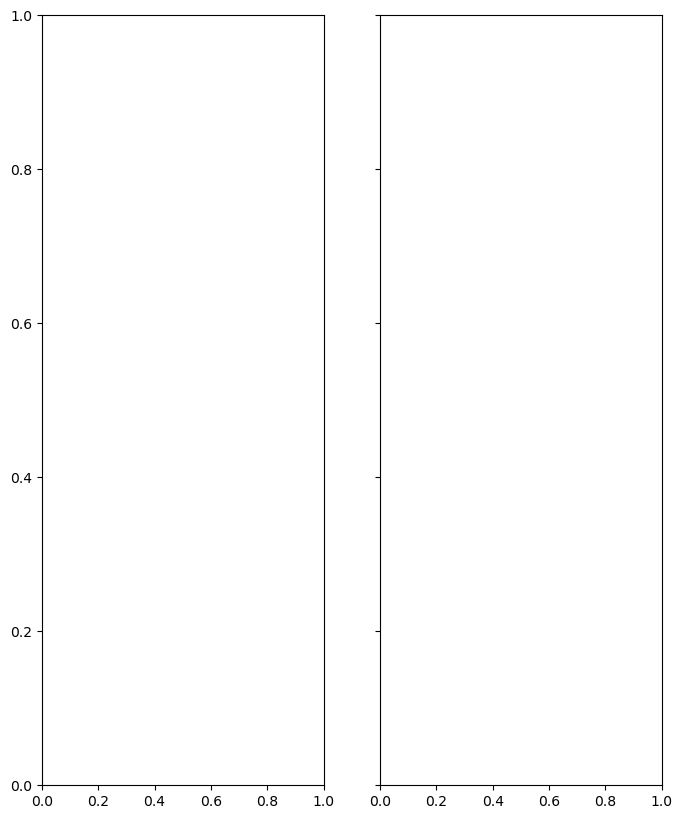

In [31]:
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

#Overall CTD information of Each Float Chosen for Seasons
sliced_data_list = []

a_values = [5903608]
for a in a_values:
    
    apDS = argo_loader.float(a).load().data
    data1 = apDS.argo.point2profile()
    data2 = data1.set_xindex("TIME")
    sliced_data = data2.sel(TIME=slice('2017-03-01','2017-12-31'))
    sliced_data_list.append(sliced_data)

import pandas as pd

for i, sliced_data in enumerate(sliced_data_list):
    
    fig, ax = plt.subplots(1, 2, figsize=(8,10), sharey=True) 

    #Calculate the max and min latitude and longitude values!
    max_lat = sliced_data.LATITUDE.max().values
    min_lat = sliced_data.LATITUDE.min().values
    max_lon = sliced_data.LONGITUDE.max().values
    min_lon = sliced_data.LONGITUDE.min().values
    min_time = pd.to_datetime(sliced_data.TIME.min().values).strftime('%Y-%m-%d')
    max_time = pd.to_datetime(sliced_data.TIME.max().values).strftime('%Y-%m-%d')


    #Calculate the number of profiles DIMENSION!
    n_prof_value = sliced_data.N_PROF.values[0]
    
    # Create a color map for time based on the date
    cmap_time = cm.get_cmap('viridis')
    norm_time = plt.Normalize(min_time, max_time)
    
    # Plot the data
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

    #Calculate the number of profiles DIMENSION!
    n_prof_value = sliced_data.N_PROF.values[0]
    
    #Temperature
    sc1 = ax[0].plot(sliced_data.TEMP,-sliced_data.PRES, c=sliced_data.TIME, alpha=0.5, cmap=cmap_time, norm=norm_time, s=15)
    ax[0].set_xlabel('Sea Temperature IN SITU ITS-90 in Celcius') 
    ax[0].set_ylabel('Sea Pressure (dbar)')
    ax[0].set_title('CTD Graphs')
    ax[0].grid()
   
    #Salinity
    sc2 = ax[1].plot(sliced_data.PSAL,-sliced_data.PRES,'bo', markersize=.15)
    ax[1].set_title(f"WSO Identifier - {a_values[i]}")
    ax[1].set_xlabel('Practical Salinity (PSU)')
    ax[1].grid()

    #Provide a text box with important information like lat, lon, and the number of profiles!
    text_plot = f"Min Lat: {min_lat:.2f}\nMax Lat: {max_lat:.2f}\nMin Lon: {min_lon:.2f}\nMax Lon: {max_lon:.2f}\nMin Time: {min_time}\nMax Time: {max_time}"
    ax[1].text(0.95, 0.05, text_plot, transform=ax[1].transAxes, ha='right', va='bottom', fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

    # Add color bar for time
    cbar_ax = fig.add_axes([0.93, 0.15, 0.02, 0.7])  # Adjust position and size of the color bar
    cbar = fig.colorbar(cm.ScalarMappable(cmap=cmap_time, norm=norm_time), cax=cbar_ax)
    cbar.set_label('Date (Year-Month-Day)')

plt.tight_layout()
plt.show()


In [30]:
#Sliced Data Time Range:
sliced_data.TIME

a_values = [5903608]
for a in a_values:
    
    apDS = argo_loader.float(a).load().data
    data1 = apDS.argo.point2profile()
    data2 = data1.set_xindex("TIME")
    sliced_data = data2.sel(TIME=slice('2017-03-01','2017-12-31'))
    sliced_data_list.append(sliced_data)

sliced_data.TIME

<xarray.DataArray 'TIME' (N_PROF: 30)>
array(['2017-03-06T07:39:03.000000000', '2017-03-16T12:42:12.000000000',
       '2017-03-26T16:07:05.000000000', '2017-04-05T20:18:11.000000000',
       '2017-04-16T00:51:16.000000000', '2017-04-26T04:13:57.000000000',
       '2017-05-06T08:49:59.000000000', '2017-05-16T12:13:24.000000000',
       '2017-05-26T16:46:29.000000000', '2017-06-05T20:17:59.000000000',
       '2017-06-16T00:39:20.000000000', '2017-06-26T03:56:53.000000000',
       '2017-07-06T08:51:59.000000000', '2017-07-16T12:01:28.000000000',
       '2017-07-26T16:08:53.000000000', '2017-08-05T20:40:31.000000000',
       '2017-08-16T00:38:24.000000000', '2017-08-26T03:58:10.000000000',
       '2017-09-05T08:47:23.000000000', '2017-09-15T12:24:45.000000000',
       '2017-09-25T16:45:22.000000000', '2017-10-05T20:16:07.000000000',
       '2017-10-16T00:36:45.000000000', '2017-10-26T04:36:06.000000000',
       '2017-11-05T08:50:52.000000000', '2017-11-15T12:06:13.000000000',
       '2017-11-25T16:49:34.000000000', '2017-12-05T20:02:44.000000000',
       '2017-12-15T23:55:29.000000000', '2017-12-26T04:39:35.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * N_PROF     (N_PROF) int32 192 193 194 195 196 197 ... 217 218 219 220 221
    LATITUDE   (N_PROF) float64 25.33 25.26 25.53 25.77 ... 25.57 25.4 25.39
    LONGITUDE  (N_PROF) float64 -145.8 -145.5 -145.4 ... -145.7 -145.5 -145.3
  * TIME       (N_PROF) datetime64[ns] 2017-03-06T07:39:03 ... 2017-12-26T04:...
Attributes: (8)

In [29]:
#Sliced Data Time Range:
sliced_data.TIME

a_values = [5903608]
for a in a_values:
    
    apDS = argo_loader.float(a).load().data
    data1 = apDS.argo.point2profile()
    data2 = data1.set_xindex("TIME")
    sliced_data = data2.sel(TIME=slice('2017-03-01','2017-12-31'))
    sliced_data_list.append(sliced_data)

# Create a custom monthly date range that jumps from one month to the next
date_range = pd.date_range(start='2017-03-01', end='2017-12-31', freq='MS')

# Iterate through the custom date range and extract the corresponding sliced_data
monthly_data_list = []
for i in range(len(date_range) - 1):
    start_date = date_range[i]
    end_date = date_range[i + 1] - pd.Timedelta(seconds=1)  # End date is the day before the next month starts
    monthly_data = sliced_data.sel(TIME=slice(start_date, end_date))
    monthly_data_list.append(monthly_data)
    
#sliced_data.TIME['2017-03-

monthly_data

<xarray.Dataset>
Dimensions:          (N_PROF: 3, N_LEVELS: 71)
Coordinates:
  * N_PROF           (N_PROF) int32 216 217 218
  * N_LEVELS         (N_LEVELS) int32 0 1 2 3 4 5 6 7 ... 64 65 66 67 68 69 70
    LATITUDE         (N_PROF) float64 25.74 25.74 25.67
    LONGITUDE        (N_PROF) float64 -146.1 -145.9 -145.8
  * TIME             (N_PROF) datetime64[ns] 2017-11-05T08:50:52 ... 2017-11-...
Data variables: (12/15)
    CYCLE_NUMBER     (N_PROF) int32 217 218 219
    DATA_MODE        (N_PROF) <U1 'D' 'D' 'D'
    DIRECTION        (N_PROF) <U1 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_PROF) int32 5903608 5903608 5903608
    POSITION_QC      (N_PROF) int32 1 1 1
    PRES             (N_PROF, N_LEVELS) float32 4.8 8.8 19.7 ... 1.95e+03 nan
    ...               ...
    PSAL_ERROR       (N_PROF, N_LEVELS) float32 0.01 0.01 0.01 ... 0.01 0.01 nan
    PSAL_QC          (N_PROF) int32 1 1 1
    TEMP             (N_PROF, N_LEVELS) float32 25.27 25.26 25.26 ... 2.166 nan
    TEMP_ERROR       (N_PROF) float32 0.002 0.002 0.002
    TEMP_QC          (N_PROF) int32 1 1 1
    TIME_QC          (N_PROF) int32 1 1 1
Attributes: (8)

## ISSUE #5 How would I allow the code to continue running after running into no data for one of the month intervals in the following?

ValueError: zero-size array to reduction operation fmax which has no identity

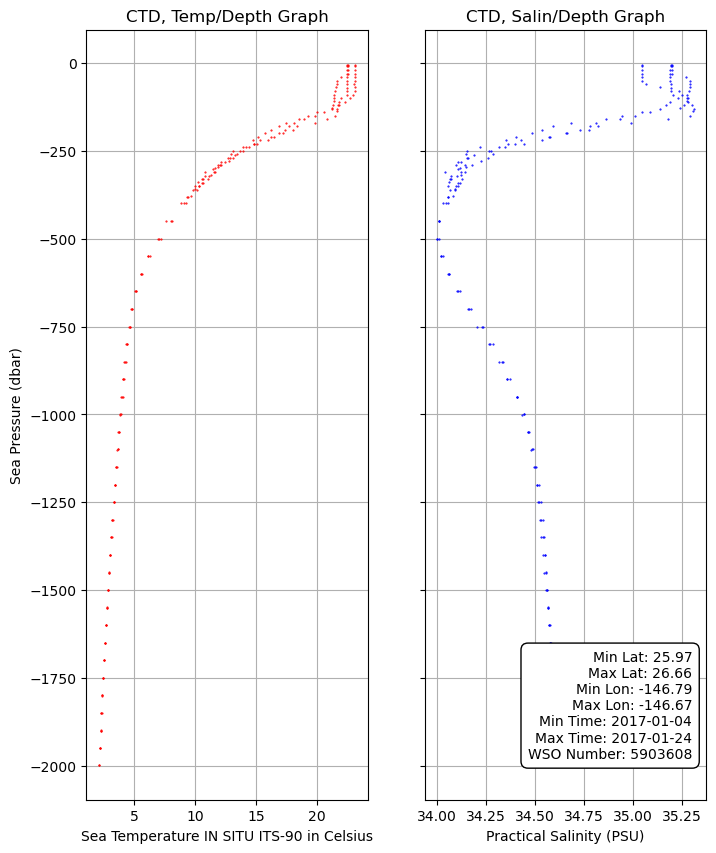

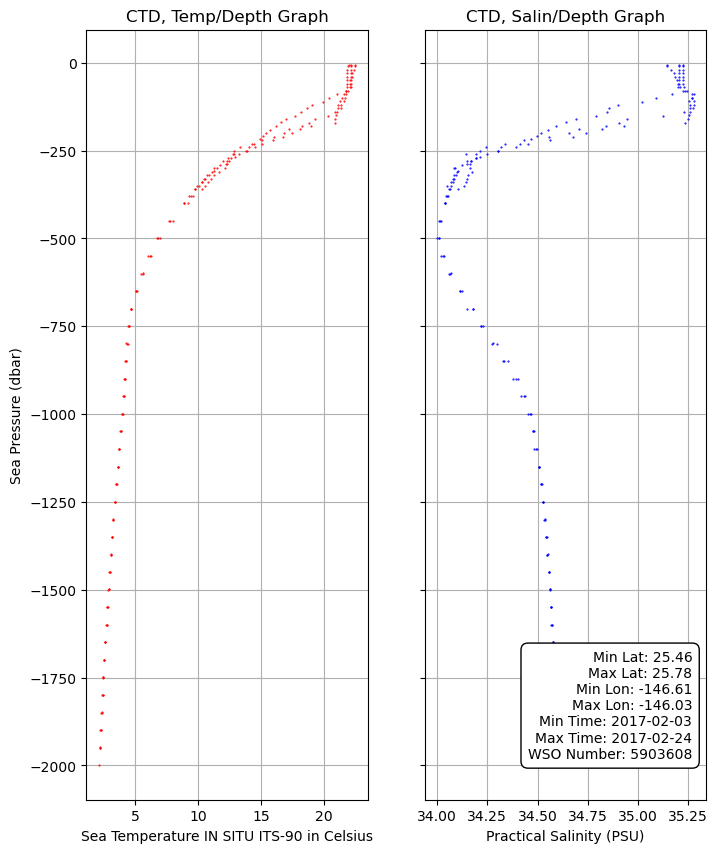

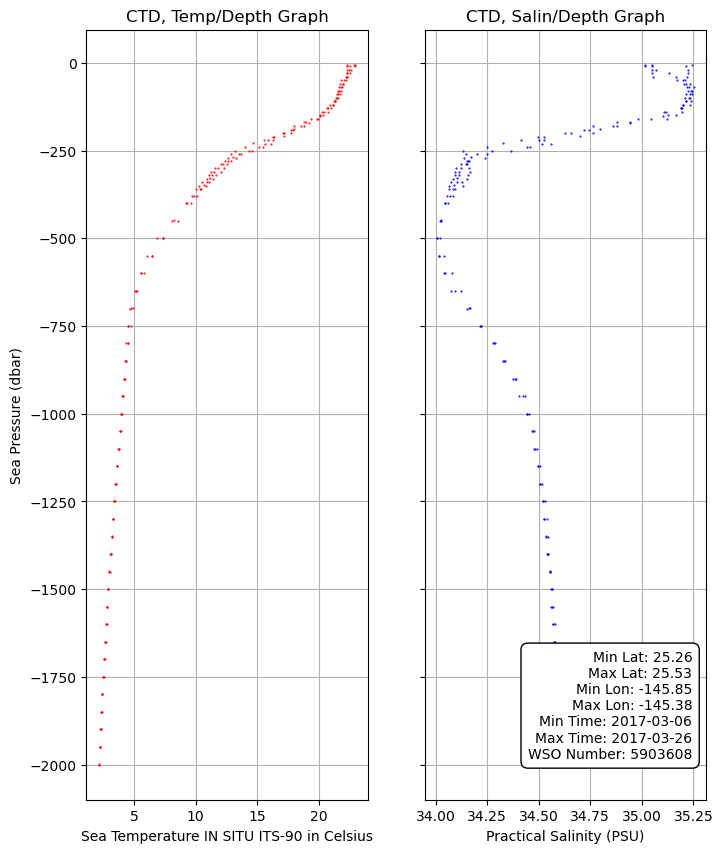

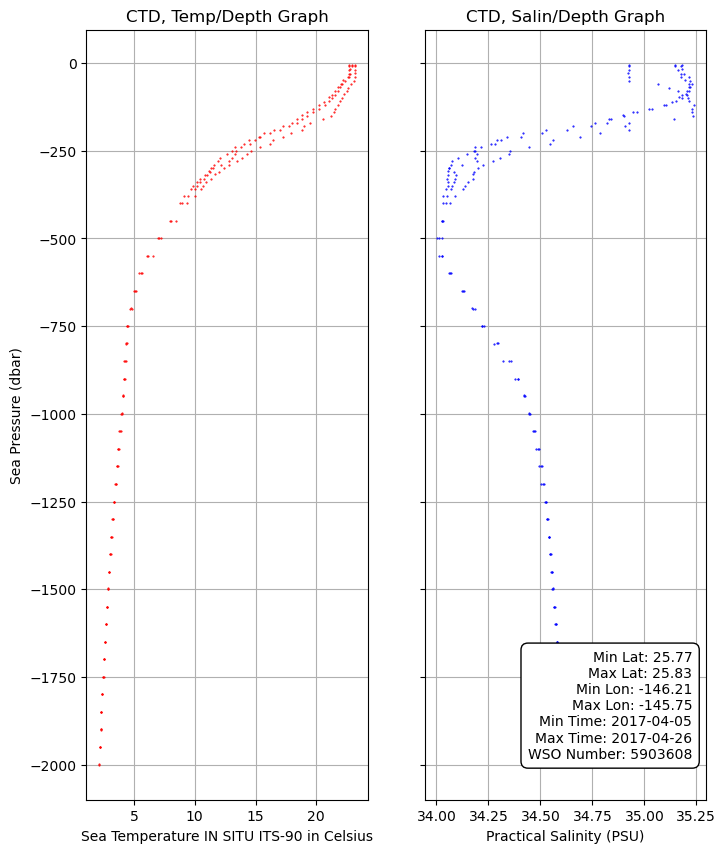

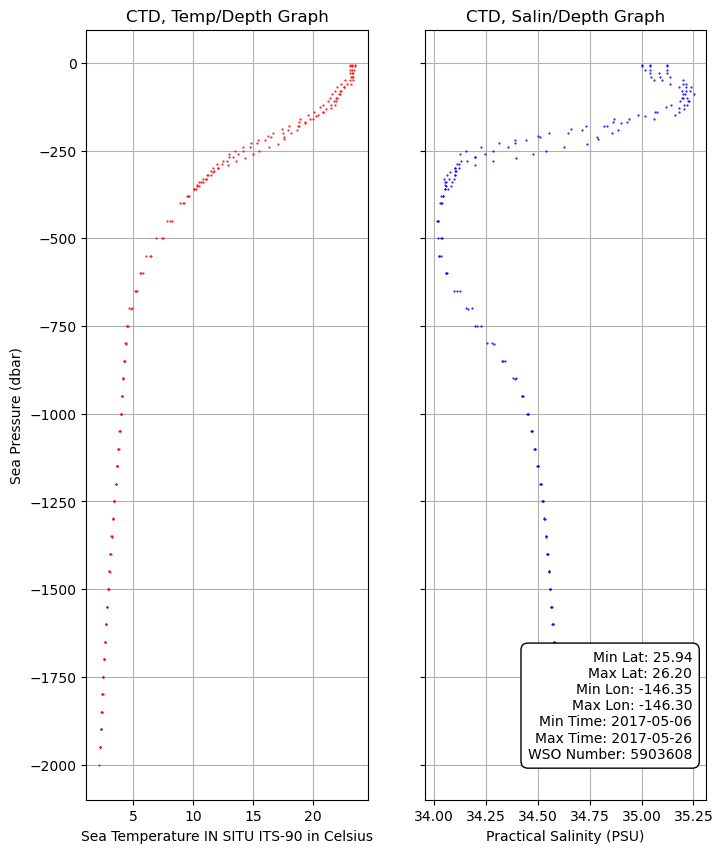

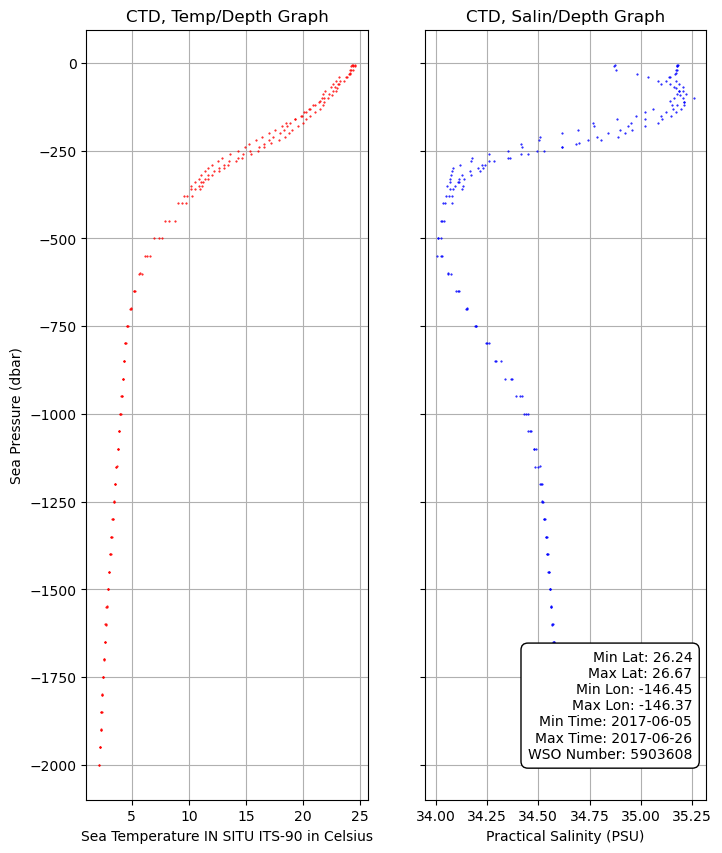

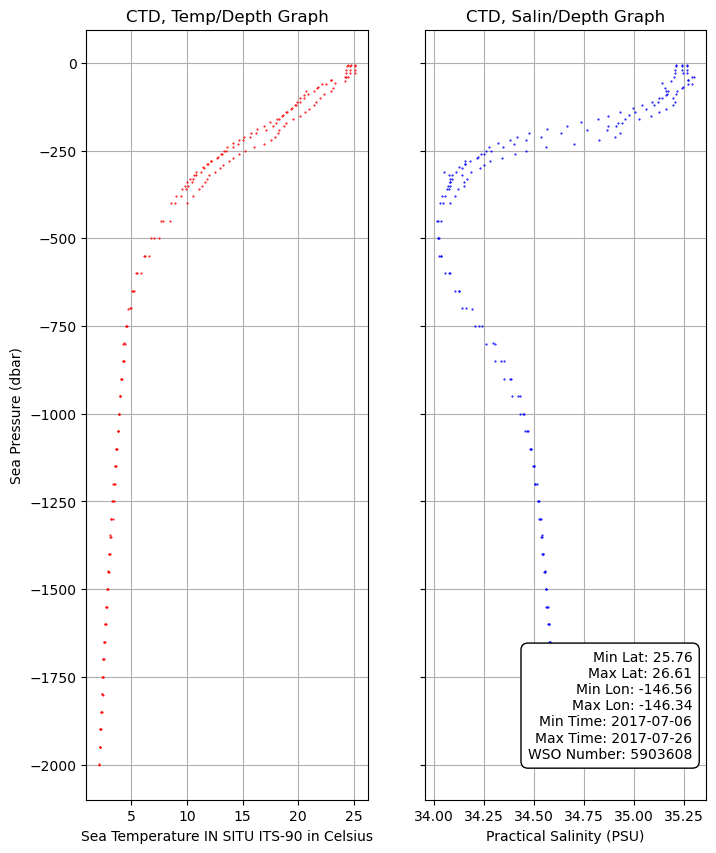

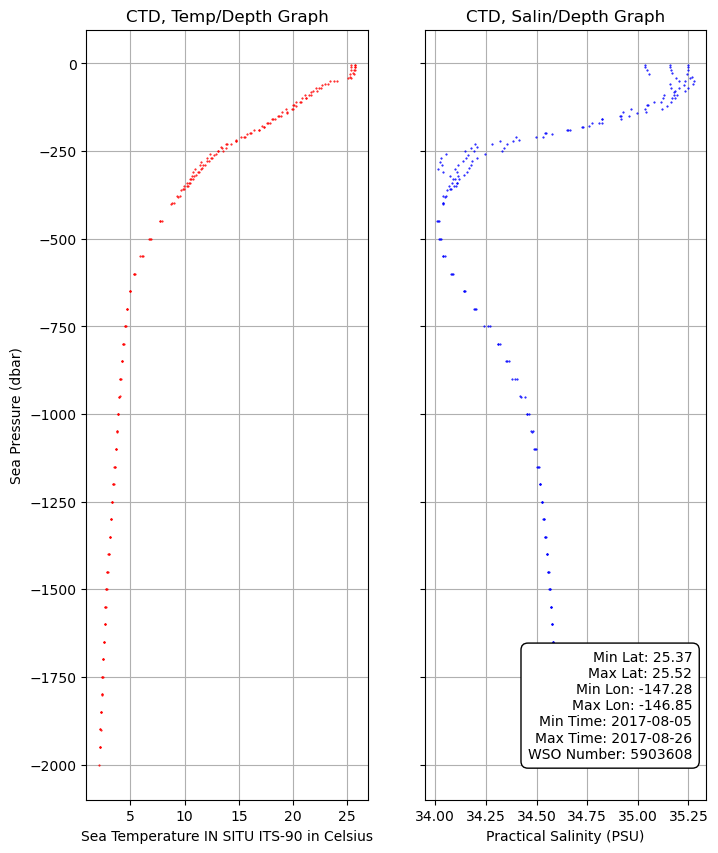

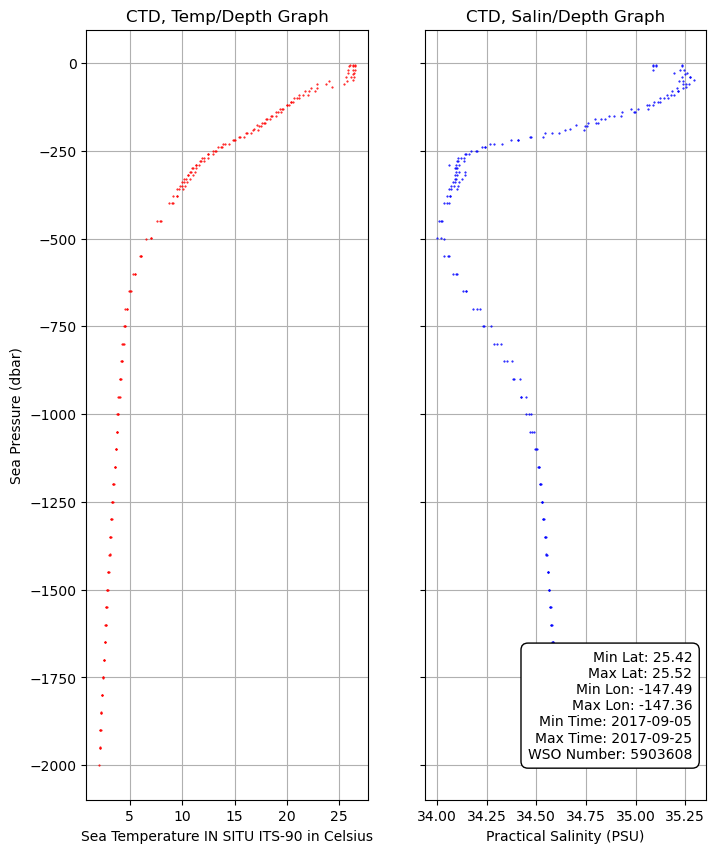

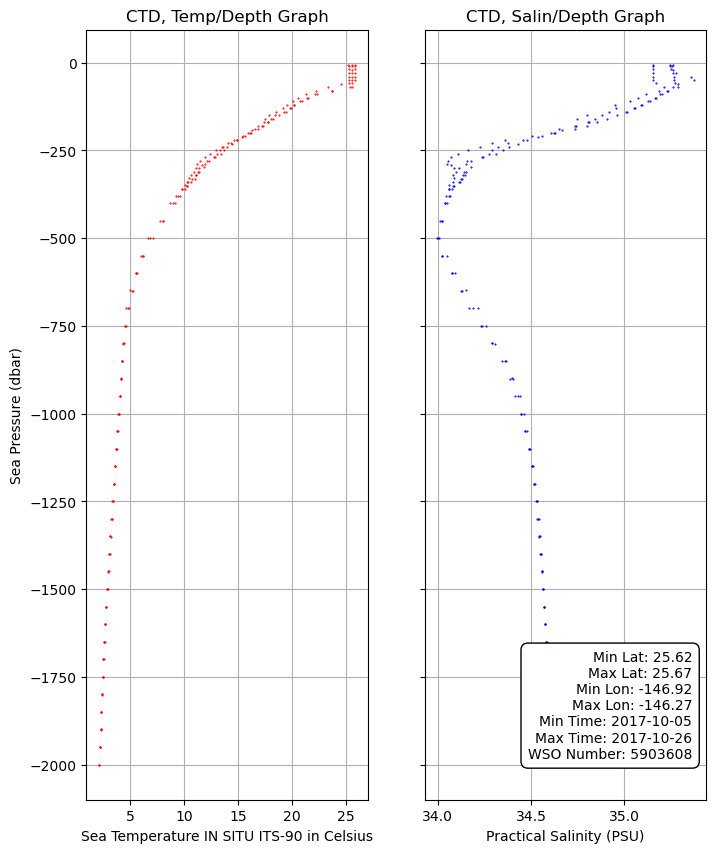

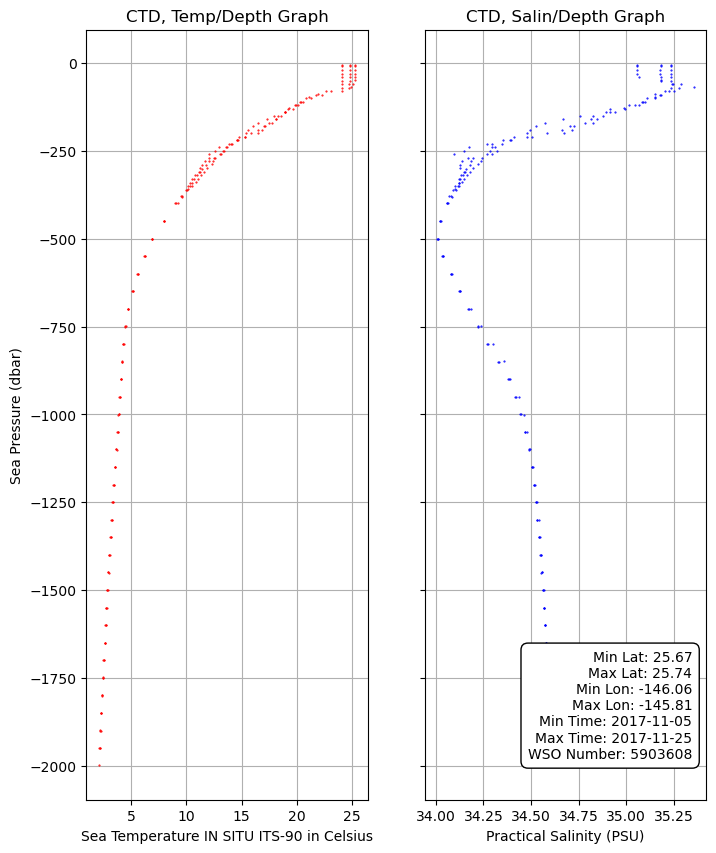

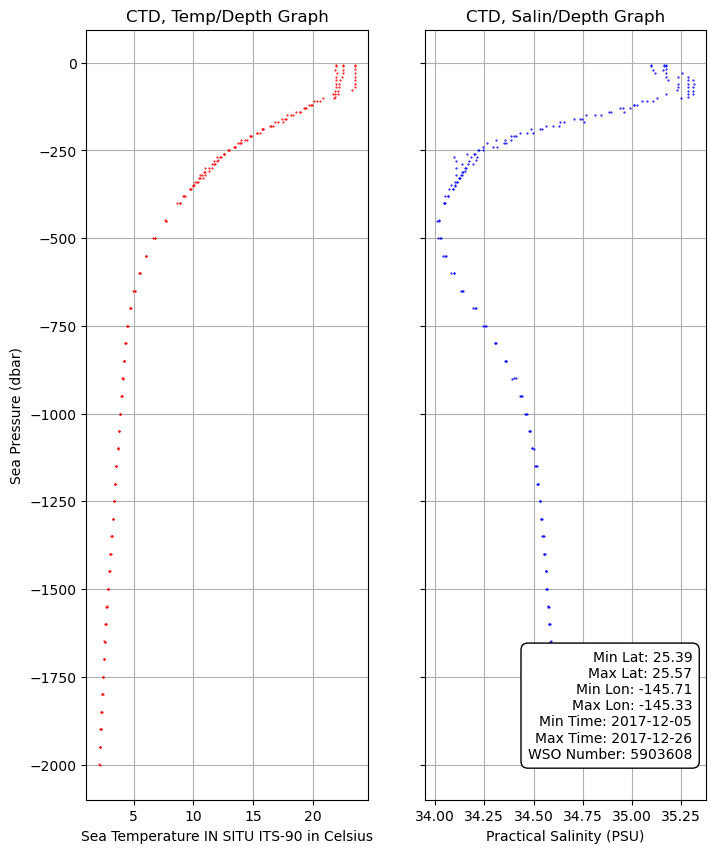

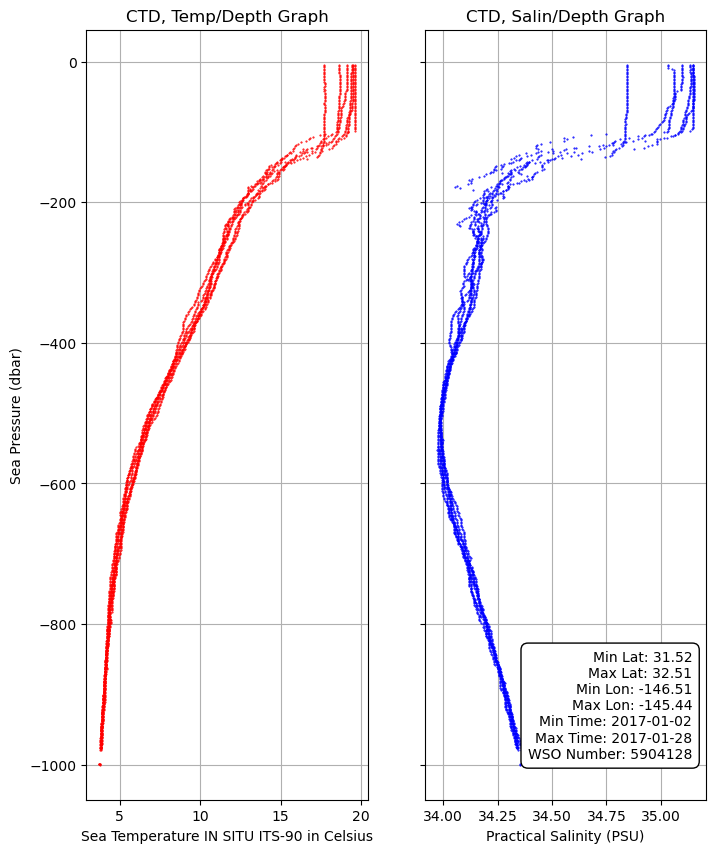

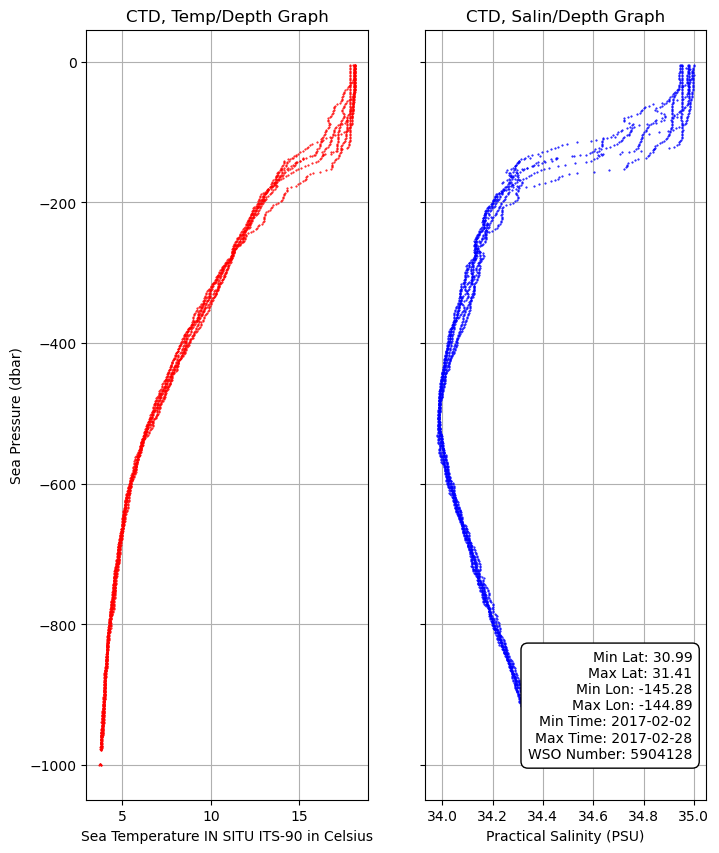

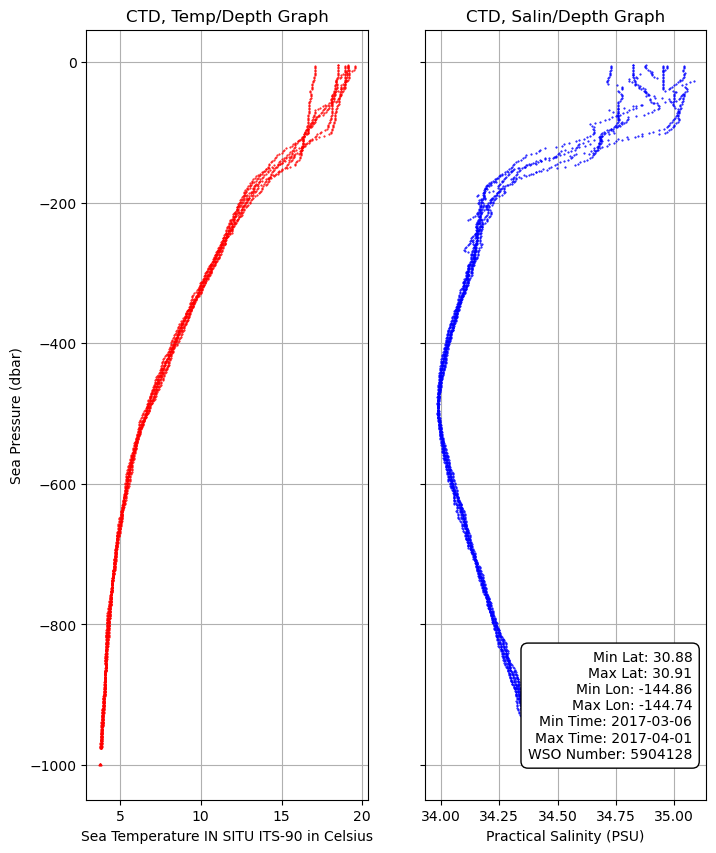

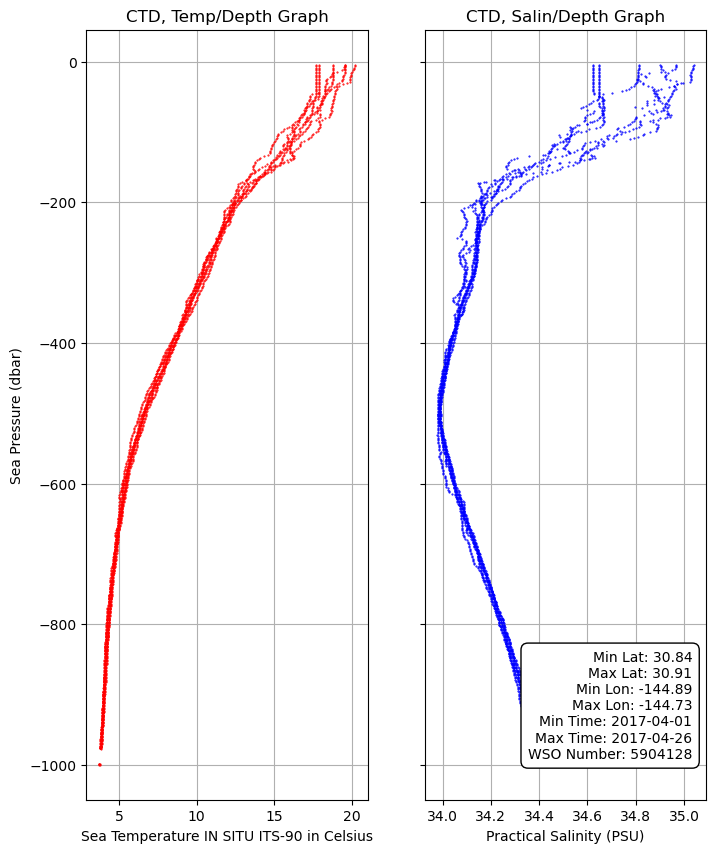

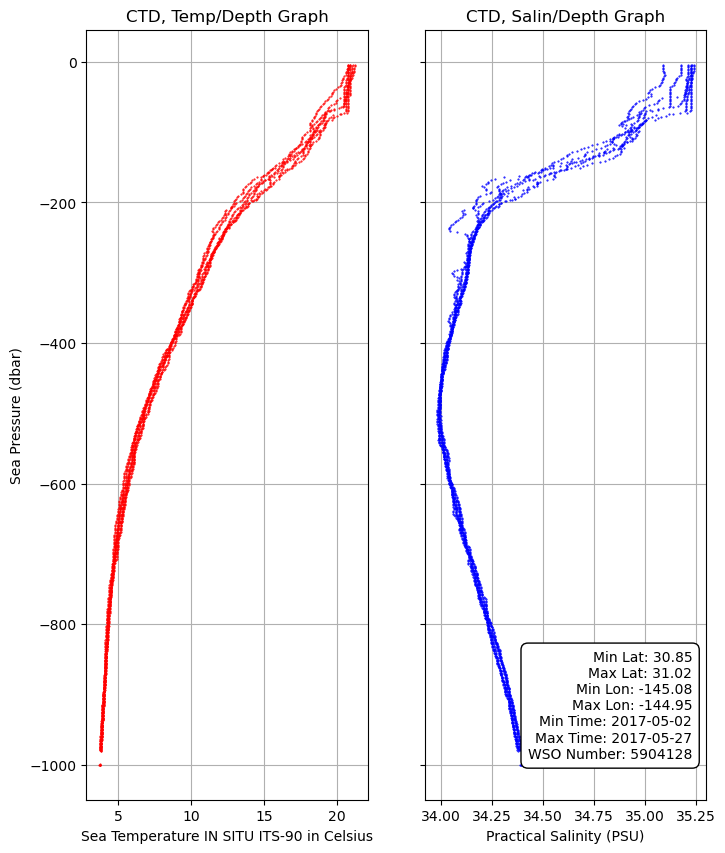

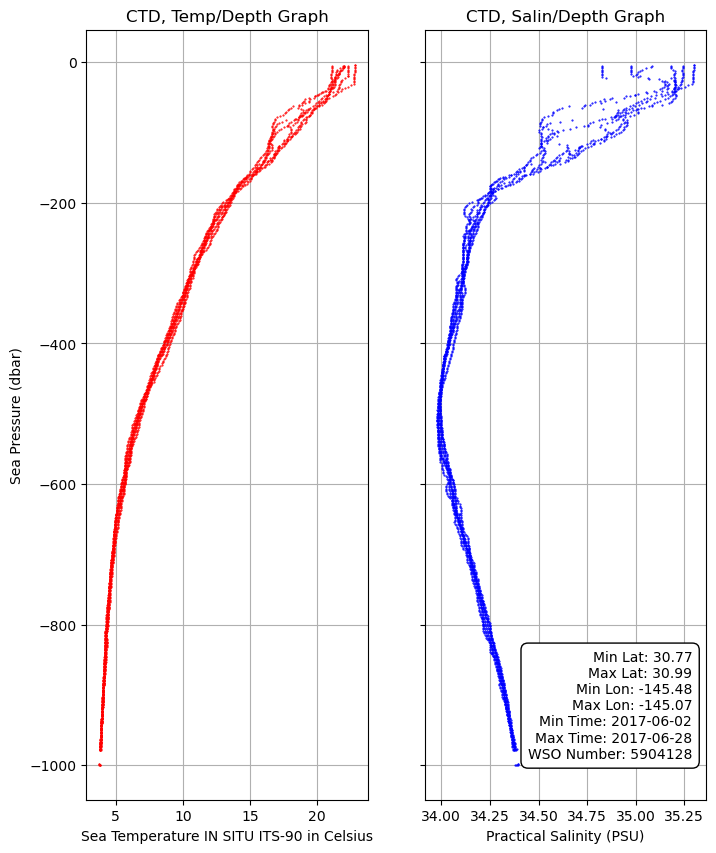

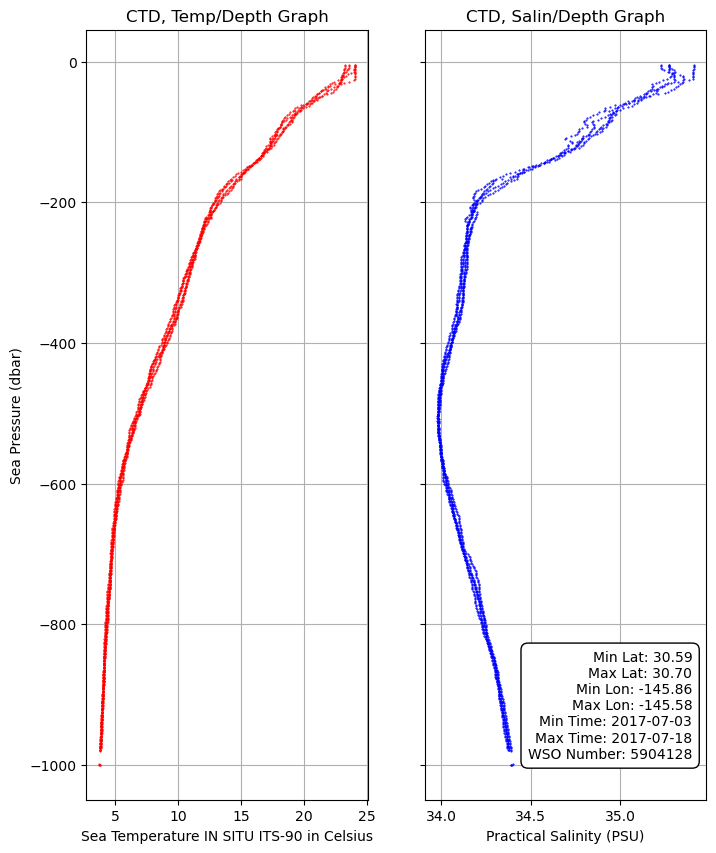

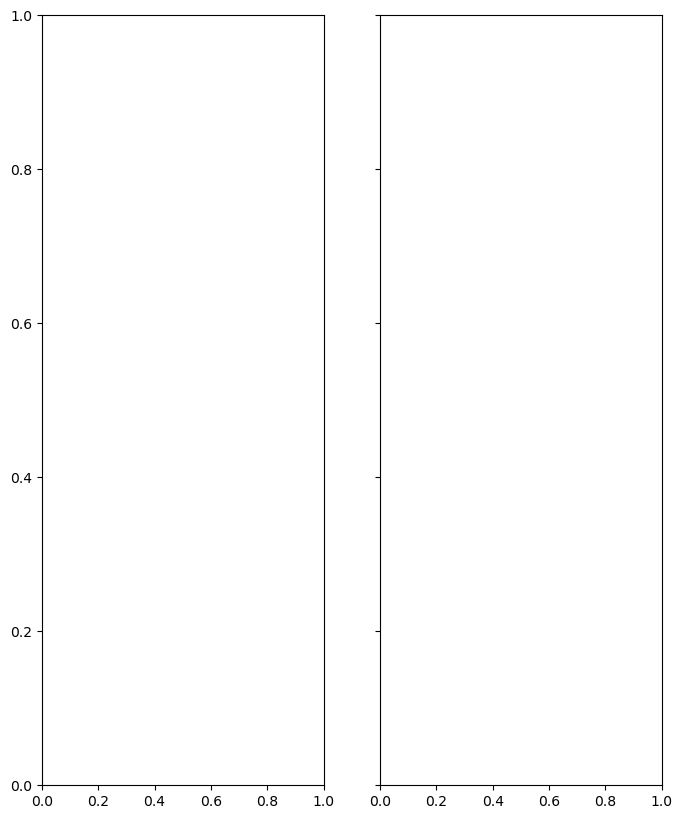

In [27]:
#The CTD graphs of each float chosen, month by month!

sliced_data_list = []

a_values = [5903608, 5904128, 5904977, 4900816, 4902251, 4902149]

for a in a_values:
    
    apDS = argo_loader.float(a).load().data
    data1 = apDS.argo.point2profile()
    data2 = data1.set_xindex("TIME")
    sliced_data = data2.sel(TIME=slice('2017-03-01','2017-12-31'))
    sliced_data_list.append(sliced_data)

import pandas as pd

def plot_graph_and_text(ax, sliced_data, a_values):
    # ... (rest of the function remains unchanged) ...
 # Calculate the max and min latitude and longitude values!
    max_lat = sliced_data.LATITUDE.max().values
    min_lat = sliced_data.LATITUDE.min().values
    max_lon = sliced_data.LONGITUDE.max().values
    min_lon = sliced_data.LONGITUDE.min().values
    min_time = pd.to_datetime(sliced_data.TIME.min().values).strftime('%Y-%m-%d')
    max_time = pd.to_datetime(sliced_data.TIME.max().values).strftime('%Y-%m-%d')
    wso_identifier = sliced_data.PLATFORM_NUMBER.min().values

    # Calculate the number of profiles DIMENSION!
    n_prof_value = sliced_data.N_PROF.values[0]

    # Temperature
    ax[0].plot(sliced_data.TEMP, -sliced_data.PRES, 'ro', markersize= .5)
    ax[0].set_xlabel('Sea Temperature IN SITU ITS-90 in Celsius')
    ax[0].set_ylabel('Sea Pressure (dbar)')
    ax[0].set_title('CTD, Temp/Depth Graph')
    ax[0].grid()

    # Salinity
    ax[1].plot(sliced_data.PSAL, -sliced_data.PRES, 'bo', markersize= .5)
    ax[1].set_title('CTD, Salin/Depth Graph')
    ax[1].set_xlabel('Practical Salinity (PSU)')
    ax[1].grid()

    # Provide a text box with important information like lat, lon, and the number of profiles!
    text_plot = f"Min Lat: {min_lat:.2f}\nMax Lat: {max_lat:.2f}\nMin Lon: {min_lon:.2f}\nMax Lon: {max_lon:.2f}\nMin Time: {min_time}\nMax Time: {max_time}\nWSO Number: {wso_identifier}"
    ax[1].text(0.95, 0.05, text_plot, transform=ax[1].transAxes, ha='right', va='bottom', fontsize=10,
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
sliced_data_list = []
date_ranges = {
    5903608: [('2017-01-01', '2017-02-01'), ('2017-02-01', '2017-03-01'), ('2017-03-01', '2017-04-01'), ('2017-04-01', '2017-05-01'),
             ('2017-05-01', '2017-06-01'), ('2017-06-01', '2017-07-01'), ('2017-07-01', '2017-08-01'), ('2017-08-01', '2017-09-01'), ('2017-09-01', '2017-10-01'), ('2017-10-01', '2017-11-01'),
             ('2017-11-01', '2017-12-01'), ('2017-12-01', '2017-12-31')], 
    5904128: [('2017-01-01', '2017-02-01'), ('2017-02-01', '2017-03-01'), ('2017-03-01', '2017-04-01'), ('2017-04-01', '2017-05-01'),
             ('2017-05-01', '2017-06-01'), ('2017-06-01', '2017-07-01'), ('2017-07-01', '2017-08-01'), ('2017-08-01', '2017-09-01'), ('2017-09-01', '2017-10-01'), ('2017-10-01', '2017-11-01'),
             ('2017-11-01', '2017-12-01'), ('2017-12-01', '2017-12-31')],
    5904977: [('2017-01-01', '2017-02-01'), ('2017-02-01', '2017-03-01'), ('2017-03-01', '2017-04-01'), ('2017-04-01', '2017-05-01'),
             ('2017-05-01', '2017-06-01'), ('2017-06-01', '2017-07-01'), ('2017-07-01', '2017-08-01'), ('2017-08-01', '2017-09-01'), ('2017-09-01', '2017-10-01'), ('2017-10-01', '2017-11-01'),
             ('2017-11-01', '2017-12-01'), ('2017-12-01', '2017-12-31')],
    4900816: [('2017-01-01', '2017-02-01'), ('2017-02-01', '2017-03-01'), ('2017-03-01', '2017-04-01'), ('2017-04-01', '2017-05-01'),
             ('2017-05-01', '2017-06-01'), ('2017-06-01', '2017-07-01'), ('2017-07-01', '2017-08-01'), ('2017-08-01', '2017-09-01'), ('2017-09-01', '2017-10-01'), ('2017-10-01', '2017-11-01'),
             ('2017-11-01', '2017-12-01'), ('2017-12-01', '2017-12-31')],
    4902251: [('2017-01-01', '2017-02-01'), ('2017-02-01', '2017-03-01'), ('2017-03-01', '2017-04-01'), ('2017-04-01', '2017-05-01'),
             ('2017-05-01', '2017-06-01'), ('2017-06-01', '2017-07-01'), ('2017-07-01', '2017-08-01'), ('2017-08-01', '2017-09-01'), ('2017-09-01', '2017-10-01'), ('2017-10-01', '2017-11-01'),
             ('2017-11-01', '2017-12-01'), ('2017-12-01', '2017-12-31')],
    4902149: [('2017-01-01', '2017-02-01'), ('2017-02-01', '2017-03-01'), ('2017-03-01', '2017-04-01'), ('2017-04-01', '2017-05-01'),
             ('2017-05-01', '2017-06-01'), ('2017-06-01', '2017-07-01'), ('2017-07-01', '2017-08-01'), ('2017-08-01', '2017-09-01'), ('2017-09-01', '2017-10-01'), ('2017-10-01', '2017-11-01'),
             ('2017-11-01', '2017-12-01'), ('2017-12-01', '2017-12-31')] #Not included because not in my own chosen bounding box regions.
}

        
for a in a_values:
    apDS = argo_loader.float(a).load().data
    data1 = apDS.argo.point2profile()
    data2 = data1.set_xindex("TIME")

    for date_range in date_ranges[a]:
        sliced_data = data2.sel(TIME=slice(date_range[0], date_range[1]))
        sliced_data_list.append(sliced_data)

for i, sliced_data in enumerate(sliced_data_list):
    fig, ax = plt.subplots(1, 2, figsize=(8, 10), sharey=True)
    plot_graph_and_text(ax, sliced_data, a_values)

plt.show()  # Add this to display all the plots together
